## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_data_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

#Convert dataset to dataframe
df_lab = pd.DataFrame(lab_data_complete)

In [4]:
# Checking the number of mice in the DataFrame.
total_mice = df_lab["Mouse ID"].nunique()
print(f'Total number of mice is {total_mice}')
#total number of mice is 249

Total number of mice is 249


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df_lab[df_lab.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [534]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = df_lab[(df_lab["Mouse ID"] == "g989")]
#duplicate_mouse

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_rows = df_lab.count
#1893 rows in dataframe df_lab

df_labdata = df_lab.drop([909])
duplicate2 = df_labdata[df_labdata.duplicated()]
# found no duplicates in duplicate2

In [16]:
# Checking the number of mice in the clean DataFrame.
total_mice = df_labdata["Mouse ID"].nunique()
print(f'Total number of mice is {total_mice}')

Total number of mice is 249


## Summary Statistics

In [258]:
# Dependencies
import numpy as np

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
SS_mean = df_labdata.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
SS_median = df_labdata.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
SS_mode = df_labdata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(st.mode)
SS_var=df_labdata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
SS_std=df_labdata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SS_sem=df_labdata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
df_SummaryStats = pd.concat([SS_mean,SS_median,SS_mode,SS_var,SS_std,SS_sem], axis=1)
df_SummaryStats.columns = ['Mean','Median','Mode','Variance','StDev','SEM']

In [535]:
# Generate a summary statistics table of mean, median, variance, standard dev
df_SummaryStats

,Mean,Median,Mode,Variance,StDev,SEM
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,"([45.0], [25])",24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,"([45.0], [25])",39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,"([45.0], [25])",43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,"([45.0], [25])",68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,"([45.0], [25])",66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,"([45.0], [25])",61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,"([45.0], [25])",42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,"([45.0], [25])",23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,"([45.0], [24])",59.450562,7.710419,0.573111


### Data shows that the drugs with lower mean (avg size of tumor after 45 days) seem to be working better than drugs with higher mean. Capomulin and Ramicane stand out with the lowest values

## Bar Plots

In [152]:
#the number of mice per time point for each treatment
timepoint= df_labdata.groupby(["Drug Regimen","Timepoint"])["Mouse ID"].count()
#timepoint

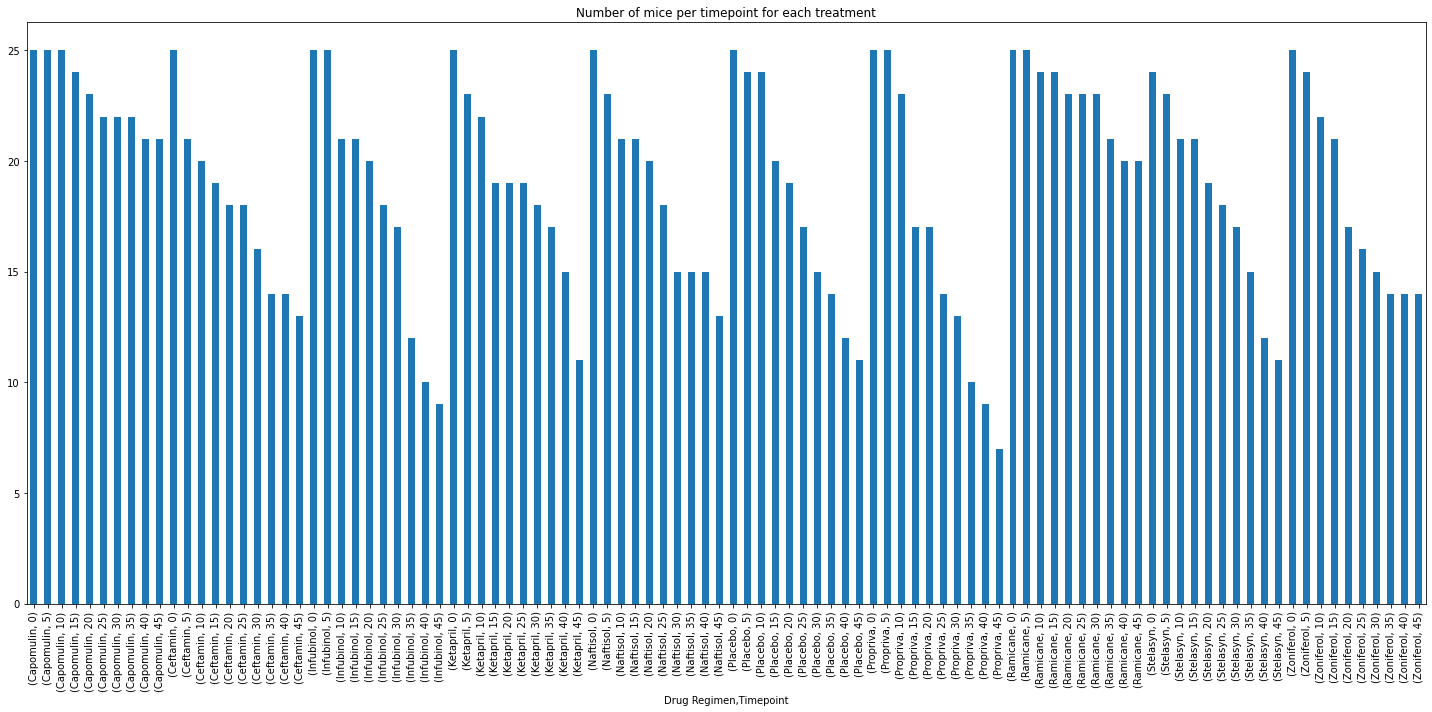

In [153]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

timepoint.plot(kind="bar", figsize=(20,10))

# Set a title for the chart
plt.title("Number of mice per timepoint for each treatment")

plt.tight_layout()
plt.show()

### Bar graph shows number of mice per drug. At day 45, we see a couple of drugs have not been working due to the decrease in number of mice present at day 45.
### Capomulin is the more consistent drug showing most of the mice didnt die.

In [295]:
#Calcuat Y axis and variables
y_values= df_labdata.groupby(["Drug Regimen","Timepoint"])["Mouse ID"].count()
type(y_values)
y_values_new = y_values.reset_index(drop=True)
y_values_new
y2 = y_values_new.to_numpy()

In [304]:
#Calcuat X axis and variables
x_values_all= df_labdata["Drug Regimen"] + df_labdata["Timepoint"].astype(str)
x_values = x_values_all.unique()


Text(0, 0.5, 'Number of mice')

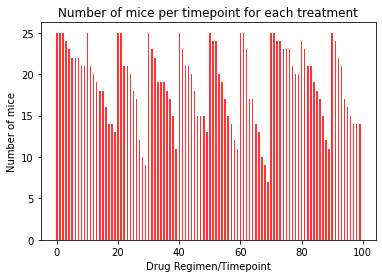

In [309]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(x_values))
y_axis = y2

plt.bar(x_axis,y_axis, color='r', alpha=0.8, align="center",width=0.5)

# Give chart some labels and a tile
plt.title("Number of mice per timepoint for each treatment")
plt.xlabel("Drug Regimen/Timepoint")
plt.ylabel("Number of mice")

#Extremely hard to read the labels so I removed them 
#Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, x_axis)

## Pie Plots

### Pie plots show the distribution between females and males. There was one less female than a male.

In [348]:
#Pie plots
labels = ["Female","Male"]
df_sexdata = df_labdata[["Mouse ID",'Sex']]
df_1 = df_labdata.groupby(["Mouse ID",'Sex'])["Mouse ID"].nunique()
sexSummary = df_1.groupby(["Sex"]).sum()

#find number of mice per sex
female = sexSummary[0]
male = sexSummary[1]

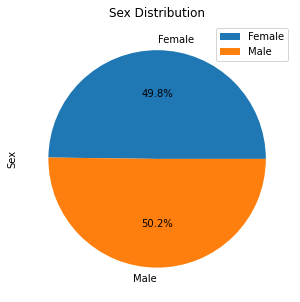

In [360]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df = pd.DataFrame({'Sex': [female, male]},
                  index=['Female', 'Male'])
plot = df.plot.pie(y='Sex', title = "Sex Distribution", autopct='%1.1f%%', figsize=(5, 5))

Text(0.5, 1.0, 'Sex Distribution')

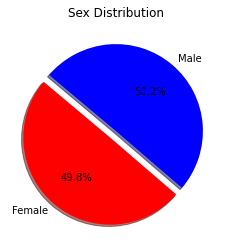

In [362]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The values of each section of the pie chart
sizes = [female, male]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate sections from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sex Distribution")


## Quartiles, Outliers and Boxplots

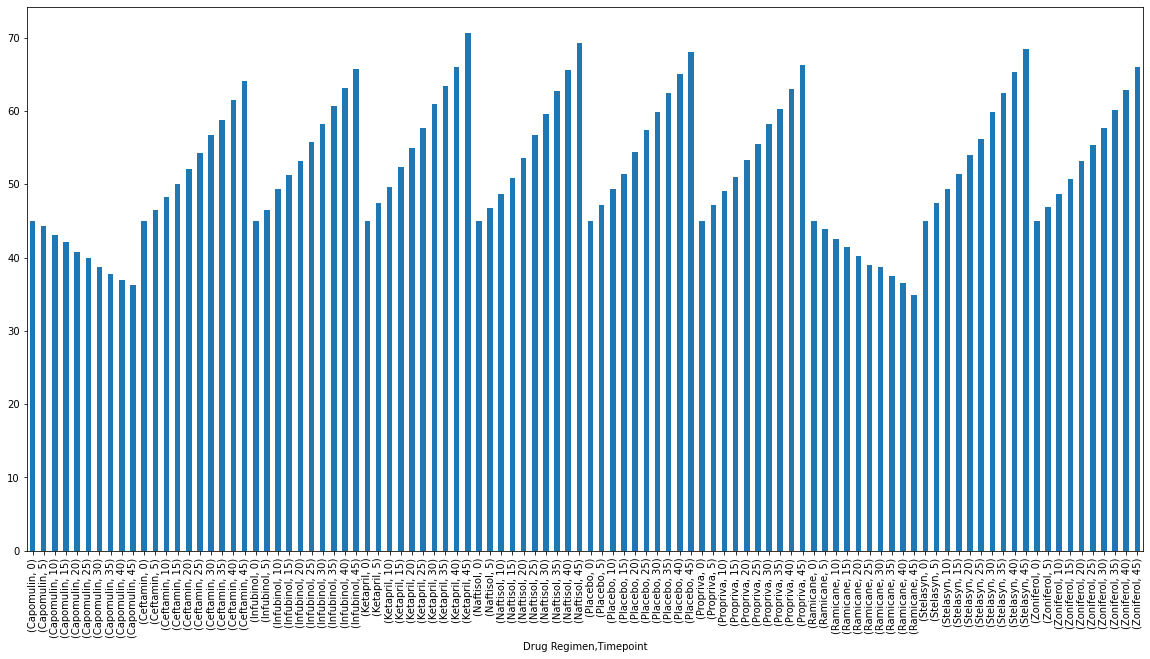

In [459]:
#Code below shows the avg size of the tumer after the treatment.  only two treaments worked well reducing the size of the tumor.

#tumorvolume = df_labdata.groupby(["Drug Regimen","Timepoint"])["Tumor Volume (mm3)"].mean()

#tumorvolume.plot(kind="bar", figsize=(20,10))
# plt.axvline()
#plt.axvline(x=24,ymin=0,ymax=1,color='red')
#plt.show() 


In [469]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

df_Ca = df_labdata[df_labdata["Drug Regimen"] == 'Capomulin'] 
df_CaFixed = df_labdata[df_labdata["Drug Regimen"] == 'Capomulin'] 
df_Ra = df_labdata[df_labdata["Drug Regimen"] == 'Ramicane']
df_In= df_labdata[df_labdata["Drug Regimen"] == 'Infubinol']
df_Ce= df_labdata[df_labdata["Drug Regimen"] == 'Ceftamin']

frames = [df_CaFixed,df_Ra,df_In,df_Ce]

df_promising1 = pd.concat(frames)
df_promising_45 = df_Promising1[df_Promising1["Timepoint"]==45]
df_promising_45
volume = df_Promising45["Tumor Volume (mm3)"]
volume_array = volume.to_numpy()
#volume_array

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {round(lowerq,4)}")
print(f"The upper quartile of volume is: {round(upperq,4)}")
print(f"The interquartile range of volume is: {round(iqr,4)}")
print(f"The median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,4)} could be outliers.")
print(f"Values above {round(upper_bound,4)} could be outliers.")


The lower quartile of volume is: 40.2202
The upper quartile of volume is: 50.3565
The interquartile range of volume is: 10.1363
The median of volume is: 45.0 
Values below 25.0157 could be outliers.
Values above 65.5609 could be outliers.


In [1]:
#Code below only generated one box plot.  Multiple box plots in next line

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#volume_array.sort()
#fig1, ax1 = plt.subplots()
#ax1.set_title('Tumor volume on day 45')
#ax1.set_ylabel('Volume (mm3)')
#ax1.boxplot(volume_array)
#plt.show()

In [556]:
#Code for muliple box plots

df_Ce_45 = df_Ce[df_Ce["Timepoint"]==45]
volume_Ce = df_Ce_45["Tumor Volume (mm3)"]

df_In_45 = df_In[df_In["Timepoint"]==45]
volume_In = df_In_45["Tumor Volume (mm3)"]

df_Ra_45 = df_Ra[df_Ra["Timepoint"]==45]
volume_Ra = df_Ra_45["Tumor Volume (mm3)"]

df_CapData_45 = df_CapData[df_CapData["Timepoint"]==45]
volume_Cap = df_CapData_45["Tumor Volume (mm3)"]

frames1 = [df_CapData_45,df_Ra_45,df_In_45,df_Ce_45]

df_allData45v1 = pd.concat(frames1)
#data = [df_Ce_45, df_In_45, df_Ra_45,df_CapData_45]

#fig7, ax7 = plt.subplots()
#ax7.set_title('Multiple Samples with Different sizes')
#ax7.boxplot(data)

#plt.show()

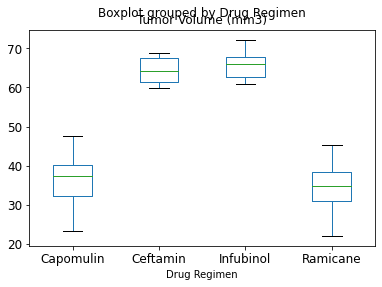

In [562]:
df_allData45v1.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False, fontsize=12 ) 


### Box plots also conclude similar information seen above. The tumor of the volume decreases significately more with the two most promising drugs: Capomulin and Ramicane

## Line and Scatter Plots

In [ ]:
df_CapData = df_labdata[df_labdata["Drug Regimen"]=="Capomulin"]

In [538]:
df_CapDataTime = df_CapData.groupby(["Timepoint"]).mean()
#df_CapDataTime

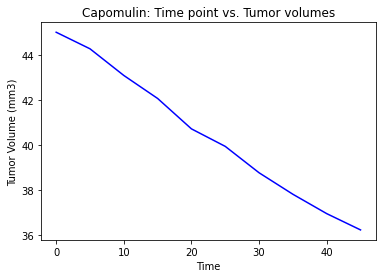

In [521]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time = df_CapDataTime.index
#time2 = time.to_numpy()

volume = df_CapDataTime["Tumor Volume (mm3)"]
#volume2 = volume.to_numpy()
#time2.sort(),volume2.sort()

world_avg, = plt.plot(time, volume, color="blue")

plt.title("Capomulin: Time point vs. Tumor volumes")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

### Capomulin shows good results that as time goes on, the size of the tumer reduces

In [539]:
#df_CapData = df_labdata[df_labdata["Drug Regimen"]=="Capomulin"]
#df_CapDataTime = df_CapData.groupby(["Timepoint"]).mean()
#df_CapData[df_CapData["Weight (g)"]== 15]

Text(0, 0.5, 'Tumor Volume (mm3)')

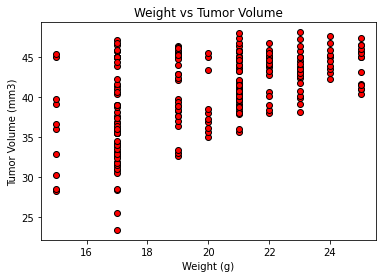

In [522]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = df_CapData["Weight (g)"]
weight3 = weight.to_numpy()

volume = df_CapData["Tumor Volume (mm3)"]
volume3 = volume.to_numpy()
#weight2.sort(),v2.sort()
plt.scatter(weight3, volume3, marker="o", facecolors="red", edgecolors="black")

plt.title("Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

In [528]:
from scipy.stats import linregress

In [526]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight3,volume3)[0],2)}") 

The correlation coefficient between malic acid and flavanoids is 0.53


### With a correlation coefficient of 0.53 we have a relatively good correlation.
### Showing that the tumor volume increases as the mice are bigger

In [529]:
x_values = df_CapData["Weight (g)"]
y_values = df_CapData["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

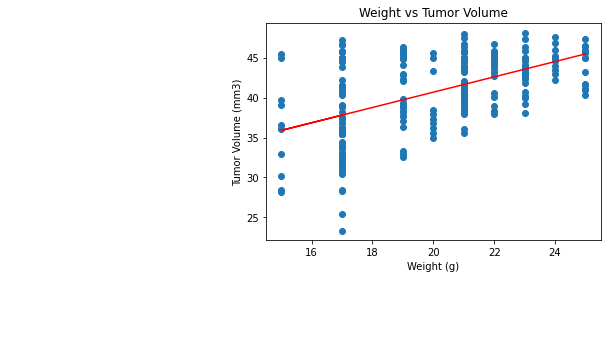

In [533]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.title("Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()